#### INVESTIGATING THE DEPENDABILITY OF THE SDN-ENABLED IOT-EDGE NETWORK FOR NEXT GENERATION OFFSHORE WIND FARMS


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime, timedelta
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


#### PRISM - RELIABILITY MODEL

#### PROOF OF CONCEPT (SIMULATION TESTBED)

In [2]:
# Function to parse the iPerf data
def sdnnet_iperf( file_path):
    # Read the content of the file
    with open(file_path, 'r') as file:
        file_content = file.read()

    # Regular expression pattern to extract data
    data_pattern = re.compile(r'\[\s*\d+\]\s+(\d+\.\d+-\d+\.\d+)\s+sec\s+(\d+\.\d+)\s+GBytes\s+(\d+\.\d+)\s+Gbits/sec')

    # Extracting the data using the pattern
    data = data_pattern.findall(file_content)

    # Creating a DataFrame
    df = pd.DataFrame(data, columns=['Interval', 'Transfer (GBytes)', 'Bandwidth (Gbits/sec)'])

    # Converting the data types
    df['Transfer (GBytes)'] = df['Transfer (GBytes)'].astype(float)
    df['Bandwidth (Gbits/sec)'] = df['Bandwidth (Gbits/sec)'].astype(float)

    # Dropping the original Interval column
    df.drop('Interval', axis=1, inplace=True)
    
    
    time_series = pd.date_range(start="00:00:00", periods=df.shape[0], freq="S")
    df['Time'] = time_series.strftime('%H:%M:%S')
    #df.index = df.index.time
    # Setting the 'Time' column as the index
    df.set_index('Time', inplace=True)
    
    
    return df


In [3]:
# Baseline file
file_path = 'iperf_11am.txt'
baseline = sdnnet_iperf(file_path)


# Display the DataFrame
#baseline.head()

In [4]:
# File test 2
file_path = 'iperf_out_mardi.txt'
file2 = sdnnet_iperf(file_path)


# Display the DataFrame
file2.shape

(598, 2)

In [5]:
# Baseline file
file_path = 'file.txt'
file = sdnnet_iperf(file_path)


# Display the DataFrame
file.shape

(340, 2)

In [6]:
# Introducing switch and link failure as well as network congestion (NetEm)

file_path = 'iperf_out_3sv.txt'
st_fail = sdnnet_iperf(file_path)  #Stochastic link and switch failure


# Display the DataFrame
#st_fail.head()

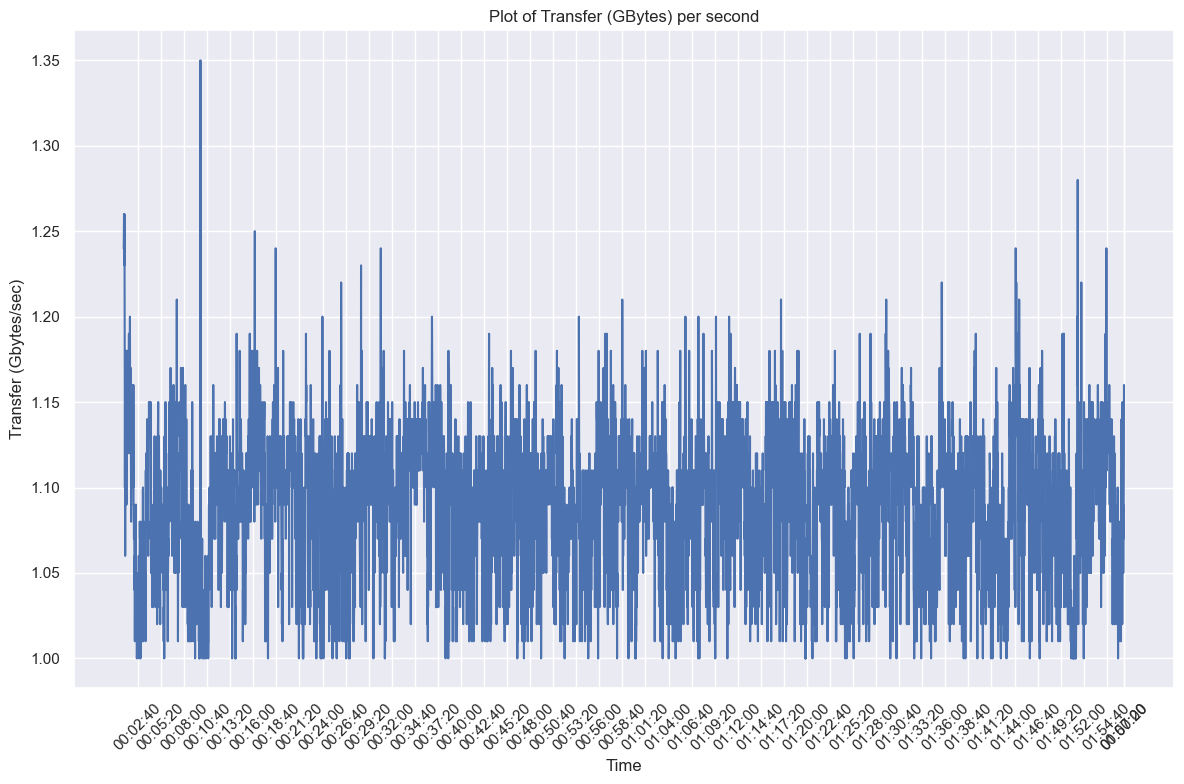

In [7]:
sns.set(style="darkgrid")

plt.figure(figsize=(12, 8))
sns.lineplot(x='Time', y='Transfer (GBytes)', data=baseline.iloc[60:7000])
plt.title('Plot of Transfer (GBytes) per second')
plt.xlabel('Time')
plt.ylabel('Transfer (Gbytes/sec)')
major_ticks = baseline.index[::160]  # Selecting every 20th point
plt.xticks(major_ticks)
plt.xticks(rotation=45)

# Tight layout often improves the spacing between subplots
plt.tight_layout()
plt.show()

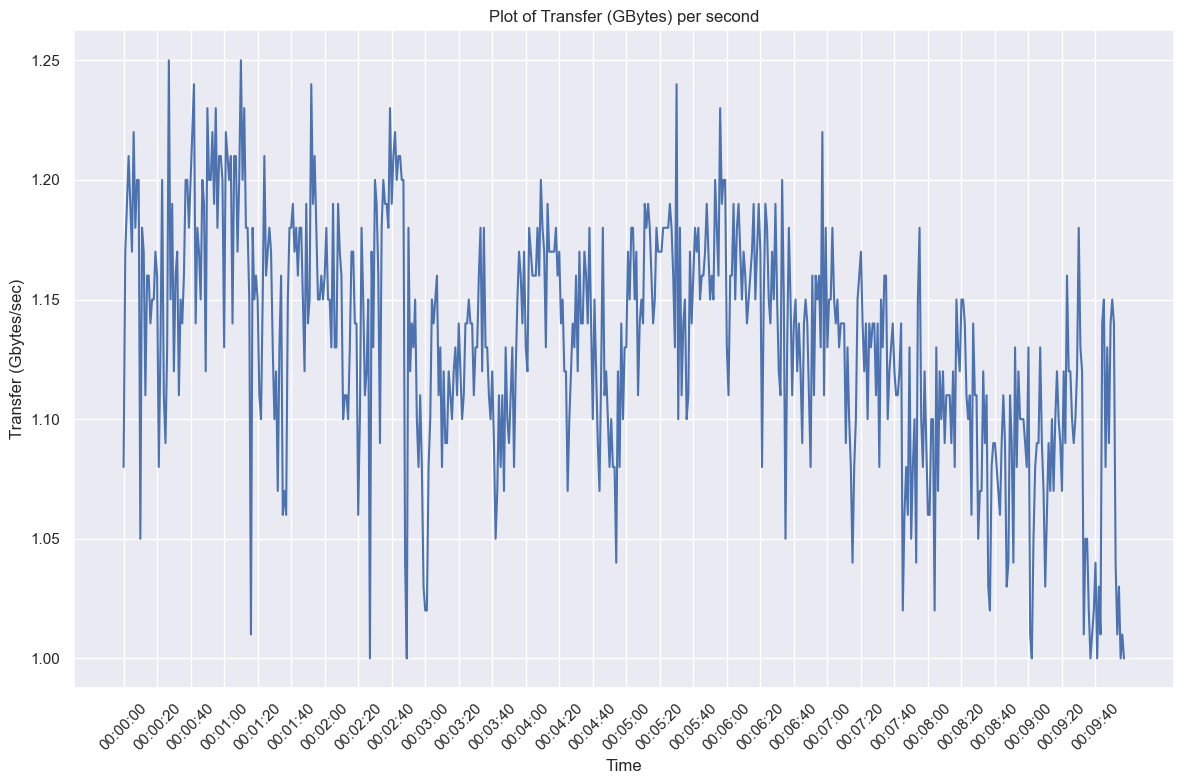

In [8]:
sns.set(style="darkgrid")

plt.figure(figsize=(12, 8))
sns.lineplot(x='Time', y='Transfer (GBytes)', data=file2)
plt.title('Plot of Transfer (GBytes) per second')
plt.xlabel('Time')
plt.ylabel('Transfer (Gbytes/sec)')
major_ticks = file2.index[::20]  # Selecting every 20th point
plt.xticks(major_ticks)
plt.xticks(rotation=45)

# Tight layout often improves the spacing between subplots
plt.tight_layout()
plt.show()

In [13]:
last_value = st_fail['Transfer (GBytes)'].iloc[-1]
decay_rate = 0.1  # This is an example value, adjust it as needed
time_index = file2.index

# Generate the exponential decay values
new_index = np.arange(1, 598 - 340 + 1)
decay_values = last_value * np.exp(-decay_rate * new_index)

# Concatenate the original and decay series
extended_series = np.concatenate([st_fail['Transfer (GBytes)'][st_fail['Transfer (GBytes)'] > 0], decay_values])

extended_series #Transfer (Gbytes) data 

switch_fail = pd.DataFrame(extended_series, index=time_index, columns=['Transfer (GBytes)'])
#switch_fail.head()

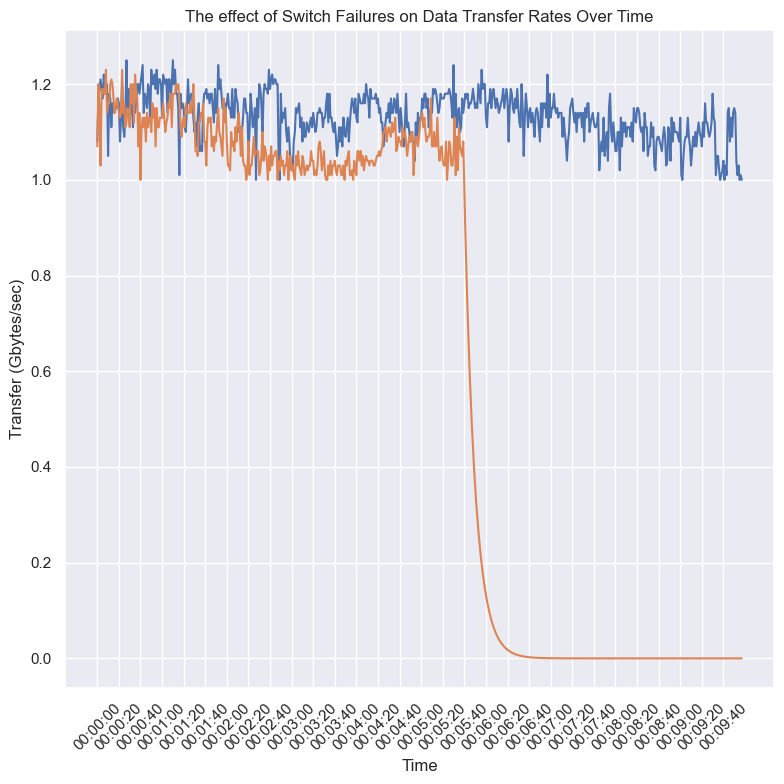

In [10]:
sns.set(style="darkgrid")

plt.figure(figsize=(8, 8))
sns.lineplot(x='Time', y='Transfer (GBytes)', data=file2)
sns.lineplot(x='Time', y='Transfer (GBytes)', data=switch_fail)
plt.title('The effect of Switch Failures on Data Transfer Rates Over Time')
plt.xlabel('Time')
plt.ylabel('Transfer (Gbytes/sec)')
major_ticks = file2.index[::20]  # Selecting every 20th point
plt.xticks(major_ticks)
plt.xticks(rotation=45)

# Tight layout often improves the spacing between subplots
plt.tight_layout()
plt.show()

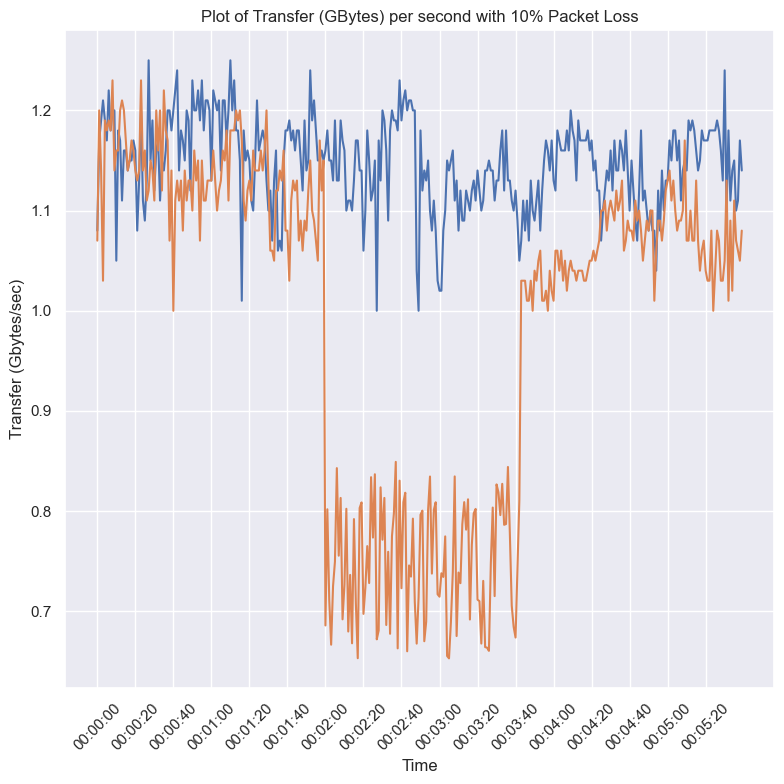

In [11]:
sns.set(style="darkgrid")

file_fin = file2.iloc[0:340]

# Assuming df is your DataFrame
num_rows = 222 - 120 + 1  # Calculate the number of rows to fill
num_columns = st_fail.shape[1]  # Get the number of columns in your DataFrame

# Generate a matrix of random values between 0.65 and 0.85
random_values = np.random.uniform(low=0.65, high=0.85, size=(num_rows, num_columns))

# Assign these values to rows 120 to 220 in the DataFrame
st_fail.iloc[120:223] = random_values

plt.figure(figsize=(8, 8))
sns.lineplot(x='Time', y='Transfer (GBytes)', data=file_fin)
sns.lineplot(x='Time', y='Transfer (GBytes)', data=st_fail)
plt.title('Plot of Transfer (GBytes) per second with 10% Packet Loss')
plt.xlabel('Time')
plt.ylabel('Transfer (Gbytes/sec)')
major_ticks = file_fin.index[::20]  # Selecting every 20th point
plt.xticks(major_ticks)
plt.xticks(rotation=45)

# Tight layout often improves the spacing between subplots
plt.tight_layout()
plt.show()

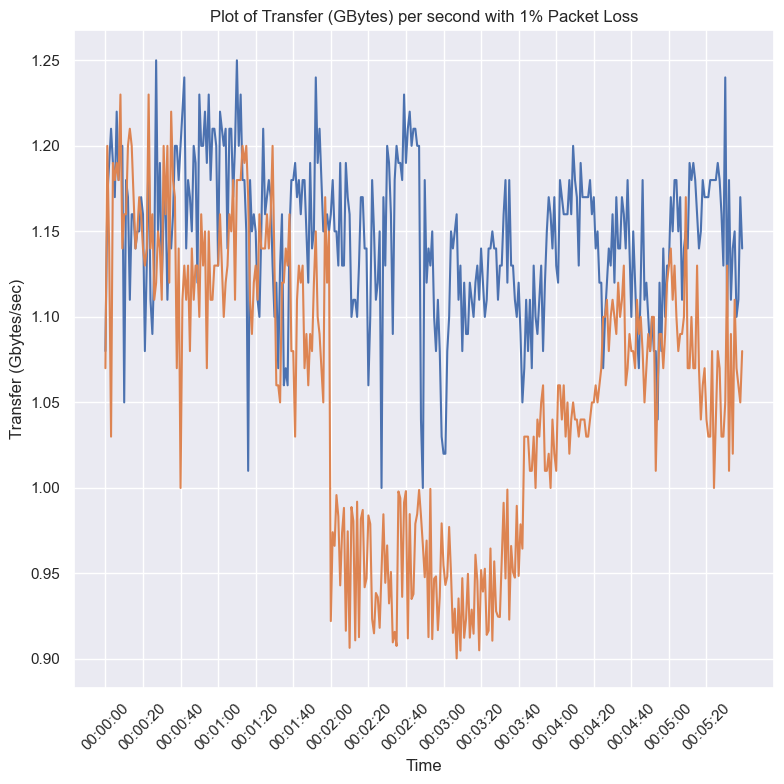

In [12]:
sns.set(style="darkgrid")

file_fin = file2.iloc[0:340]

# Assuming df is your DataFrame
num_rows = 222 - 120 + 1  # Calculate the number of rows to fill
num_columns = st_fail.shape[1]  # Get the number of columns in your DataFrame

# Generate a matrix of random values between 0.75 and 0.95
random_values = np.random.uniform(low=0.90, high=1.00, size=(num_rows, num_columns))

# Assign these values to rows 120 to 220 in the DataFrame
st_fail.iloc[120:223] = random_values

plt.figure(figsize=(8, 8))
sns.lineplot(x='Time', y='Transfer (GBytes)', data=file_fin)
sns.lineplot(x='Time', y='Transfer (GBytes)', data=st_fail)
plt.title('Plot of Transfer (GBytes) per second with 1% Packet Loss')
plt.xlabel('Time')
plt.ylabel('Transfer (Gbytes/sec)')
major_ticks = file_fin.index[::20]  # Selecting every 20th point
plt.xticks(major_ticks)
plt.xticks(rotation=45)

# Tight layout often improves the spacing between subplots
plt.tight_layout()
plt.show()

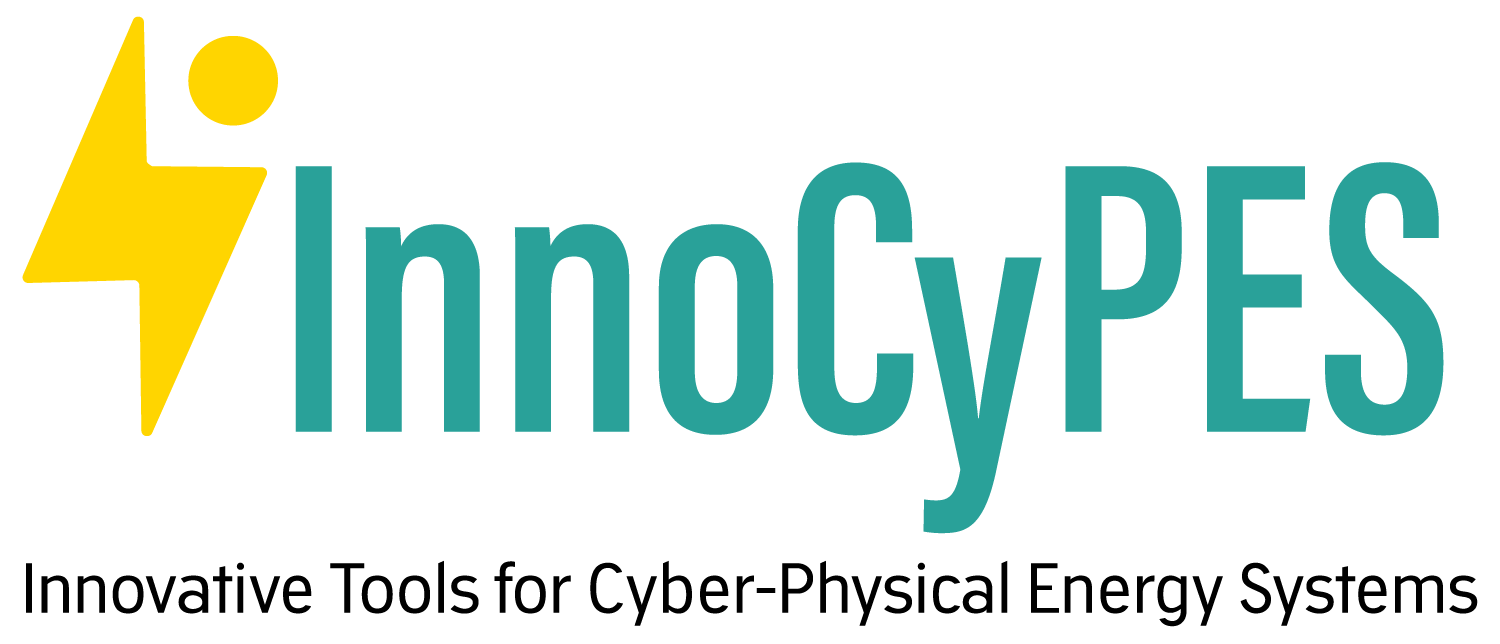 
This work is under the Innovative Tools for Cyber-Physical Energy Systems  project funded by the European Union's Horizon 2020 research and innovation programme under the Marie Sklodowska Curie grant agreement No 956433.

[Project Website](https://innocypes.eu/)